In [44]:
# Necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv("datasets/HousingData.csv")
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [16]:
train, val = train_test_split(df)
X_train, y_train = train.drop('MEDV', axis=1), train.MEDV
X_test, y_test = val.drop('MEDV', axis=1), val.MEDV

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((295, 13), (295,), (99, 13), (99,))

In [66]:
class GradientBoostingRegression():
    def __init__(self, num_regressors=100, learning_rate=0.1, max_tree_depth=4):
        self.num_regressors = num_regressors
        self.learning_rate = learning_rate
        self.max_tree_depth = max_tree_depth
        self.y_pred_initial = None
        self.models = []
        self.losses = []
        
        self.residuals_ = []
    
    def get_loss(self, true, predicted):
        """MSE

        Args:
            true (ndarray): True values
            predicted (ndarray): Predicted values

        Returns:
            MSE: Mean squared error
        """
        return 1/2 * np.sum((true - predicted)**2) / len(true)
    
    def get_gradient(self, true, pred):
        return (true - pred)
    
    def fit(self, X, y):
        N = X.shape[0]
        
        # Initialize initial prediction.
        y_pred = np.full(N, np.mean(y), dtype=np.float64)
        self.y_pred_initial = np.mean(y)
        
        for i in range(self.num_regressors):
            loss = self.get_loss(y, y_pred)
            self.losses.append(loss)
            
            # Compute residuals.
            residuals = self.get_gradient(y, y_pred)
            
            if i % 10 == 0:
                print(f"Loss at epoch({i} = {loss})")
                self.residuals_.append(residuals)
            
            # Build regression tree to predict residuals.
            decision_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=self.max_tree_depth, random_state=52)
            decision_tree.fit(X, residuals)
            self.models.append(decision_tree)
            
            y_pred += self.learning_rate * decision_tree.predict(X)
        
        plt.figure(figsize=(10, 10))
        plt.plot(range(self.num_regressors), self.losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.draw()
    
    def predict(self, X):
        y_pred = np.full(len(X), self.y_pred_initial, dtype=np.float64)
        for i in range(self.num_regressors):
            decision_tree = self.models[i]
            y_pred += self.learning_rate * decision_tree.predict(X)
        print(y_pred.shape)
        return y_pred

Loss at epoch(0 = 44.07964975581729)
Loss at epoch(10 = 6.585724194589818)
Loss at epoch(20 = 1.2903782497103713)
Loss at epoch(30 = 0.34466140519766786)
Loss at epoch(40 = 0.13120379138881705)
Loss at epoch(50 = 0.06439362513164638)
Loss at epoch(60 = 0.035271265409653876)
Loss at epoch(70 = 0.022070852064694536)
Loss at epoch(80 = 0.012753564125820127)
Loss at epoch(90 = 0.008969635952711543)
Loss at epoch(100 = 0.00632153188533922)
Loss at epoch(110 = 0.003933502404575341)
Loss at epoch(120 = 0.002823149799366014)
Loss at epoch(130 = 0.0019081925863286952)
Loss at epoch(140 = 0.0012545153641130512)
Loss at epoch(150 = 0.0008691496169123527)
Loss at epoch(160 = 0.0005796317221172972)
Loss at epoch(170 = 0.00039511787531031236)
Loss at epoch(180 = 0.00025962493988135056)
Loss at epoch(190 = 0.00016765232355792247)


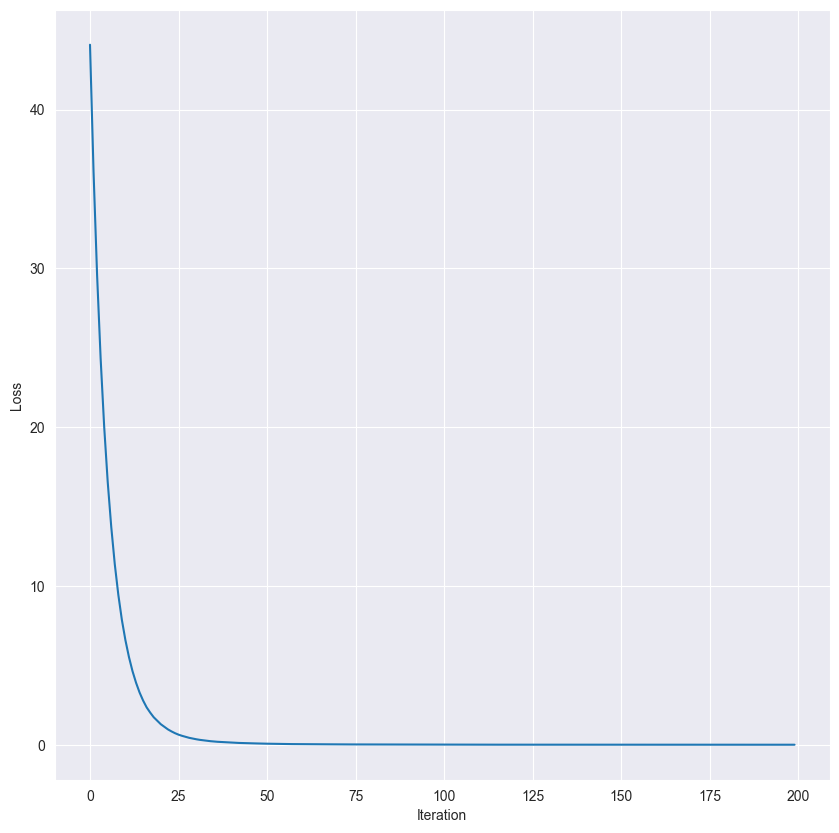

In [73]:
gbr = GradientBoostingRegression(num_regressors=200, max_tree_depth=6)
gbr.fit(X_train, y_train)

In [74]:
y_pred = gbr.predict(X_test)
mean_squared_error(y_test, y_pred)

(99,)


8.339314511327023

In [75]:
lib_gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=4, verbose=1)
lib_gbr.fit(X_train, y_train)
mean_squared_error(y_test, lib_gbr.predict(X_test))

      Iter       Train Loss   Remaining Time 
         1          72.9359            0.10s
         2          60.6744            0.10s
         3          50.6533            0.06s
         4          42.5217            0.08s
         5          35.8401            0.09s
         6          30.3032            0.09s
         7          25.7986            0.08s
         8          22.0393            0.08s
         9          18.8876            0.08s
        10          16.4038            0.08s
        20           5.2010            0.07s
        30           2.6950            0.06s
        40           1.7540            0.05s
        50           1.3490            0.04s
        60           1.0815            0.04s
        70           0.8530            0.03s
        80           0.6628            0.02s
        90           0.5500            0.01s
       100           0.4642            0.00s


7.9637674452288065